<a href="https://colab.research.google.com/github/gilbertsam/TravelInsurance/blob/main/TravelInsuranceTest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Install kaggle
!pip install -q kaggle
#Mengupload kaggle.json api keys
from google.colab import files
files.upload()
#Membuat direktori kaggle
! mkdir ~/.kaggle
#Membuat duplikat file kaggle.json kedalam direktori kaggle
! cp kaggle.json ~/.kaggle/
#mengubah hak askses file kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [ ]:
!kaggle datasets download -d tejashvi14/travel-insurance-prediction-data

  0% 0.00/13.0k [00:00<?, ?B/s]
100% 13.0k/13.0k [00:00<00:00, 10.7MB/s]


In [ ]:
!unzip '/content/travel-insurance-prediction-data.zip'

Archive:  /content/travel-insurance-prediction-data.zip
  inflating: TravelInsurancePrediction.csv  


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('TravelInsurancePrediction.csv')
df.head()

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           1987 non-null   int64 
 1   Age                  1987 non-null   int64 
 2   Employment Type      1987 non-null   object
 3   GraduateOrNot        1987 non-null   object
 4   AnnualIncome         1987 non-null   int64 
 5   FamilyMembers        1987 non-null   int64 
 6   ChronicDiseases      1987 non-null   int64 
 7   FrequentFlyer        1987 non-null   object
 8   EverTravelledAbroad  1987 non-null   object
 9   TravelInsurance      1987 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 155.4+ KB


In [ ]:
df.isnull().sum()

Unnamed: 0             0
Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64

In [ ]:
#drop index_unamed
df=df.drop('Unnamed: 0',axis=1)
df.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


In [ ]:
df.describe()

,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance
count,1987.000000,1.987000e+03,1987.000000,1987.000000,1987.000000
mean,29.650226,9.327630e+05,4.752894,0.277806,0.357323
std,2.913308,3.768557e+05,1.609650,0.448030,0.479332
min,25.000000,3.000000e+05,2.000000,0.000000,0.000000
25%,28.000000,6.000000e+05,4.000000,0.000000,0.000000
50%,29.000000,9.000000e+05,5.000000,0.000000,0.000000
75%,32.000000,1.250000e+06,6.000000,1.000000,1.000000
max,35.000000,1.800000e+06,9.000000,1.000000,1.000000


In [ ]:
df["TravelInsurance"]= df["TravelInsurance"].map({0: "not purchased", 1: "purchased"})
df["ChronicDiseases"]= df["ChronicDiseases"].map({0: "No", 1: "Yes"})

In [ ]:
cat=[]
num=[]
for i in df.columns:
  if df[i].dtype=='object':
    cat.append(i)
  else:
    num.append(i)
print("cat=",cat)
print("num=", num)

cat= ['Employment Type', 'GraduateOrNot', 'ChronicDiseases', 'FrequentFlyer', 'EverTravelledAbroad', 'TravelInsurance']
num= ['Age', 'AnnualIncome', 'FamilyMembers']


In [ ]:
df[cat].describe()

,Employment Type,GraduateOrNot,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
count,1987,1987,1987,1987,1987,1987
unique,2,2,2,2,2,2
top,Private Sector/Self Employed,Yes,No,No,No,not purchased
freq,1417,1692,1435,1570,1607,1277


In [ ]:
df[num].describe()

,Age,AnnualIncome,FamilyMembers
count,1987.000000,1.987000e+03,1987.000000
mean,29.650226,9.327630e+05,4.752894
std,2.913308,3.768557e+05,1.609650
min,25.000000,3.000000e+05,2.000000
25%,28.000000,6.000000e+05,4.000000
50%,29.000000,9.000000e+05,5.000000
75%,32.000000,1.250000e+06,6.000000
max,35.000000,1.800000e+06,9.000000


<p> Multivariate Analysis </p>

In [ ]:
df[cat].head()

,Employment Type,GraduateOrNot,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,Government Sector,Yes,Yes,No,No,not purchased
1,Private Sector/Self Employed,Yes,No,No,No,not purchased
2,Private Sector/Self Employed,Yes,Yes,No,No,purchased
3,Private Sector/Self Employed,Yes,Yes,No,No,not purchased
4,Private Sector/Self Employed,Yes,Yes,Yes,No,not purchased


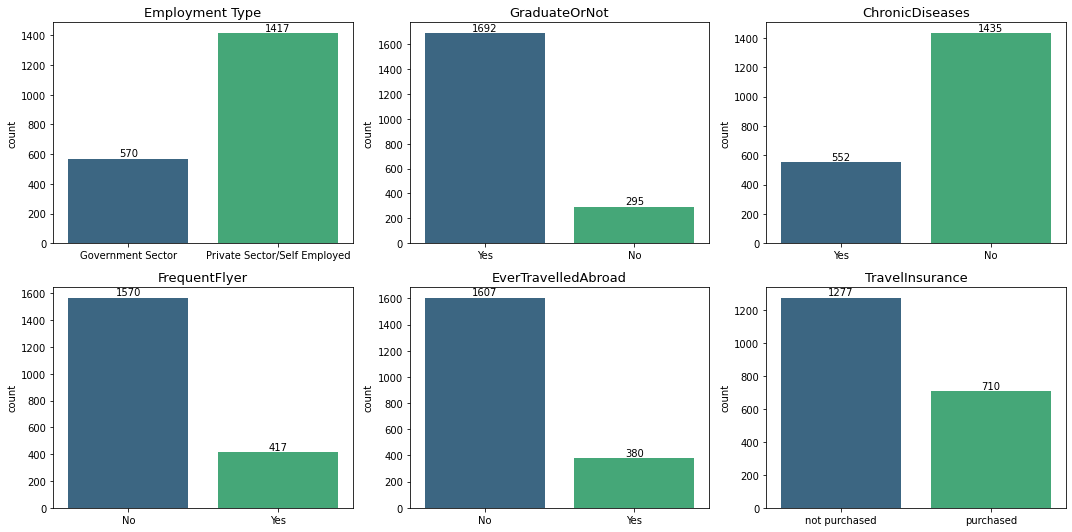

In [ ]:
plt.figure(figsize=(15, 7.5))
for x in range(0, len(cat)):
    plt.subplot(2, 3, x+1)
    ax = sns.countplot(x=df[cat[x]], palette='viridis', data=df)
    for container in ax.containers:
        ax.bar_label(container)
    plt.title(cat[x], fontsize = 13)
    plt.xlabel('')
    plt.tight_layout()

In [ ]:
df[num].head()

,Age,AnnualIncome,FamilyMembers
0,31,400000,6
1,31,1250000,7
2,34,500000,4
3,28,700000,3
4,28,700000,8


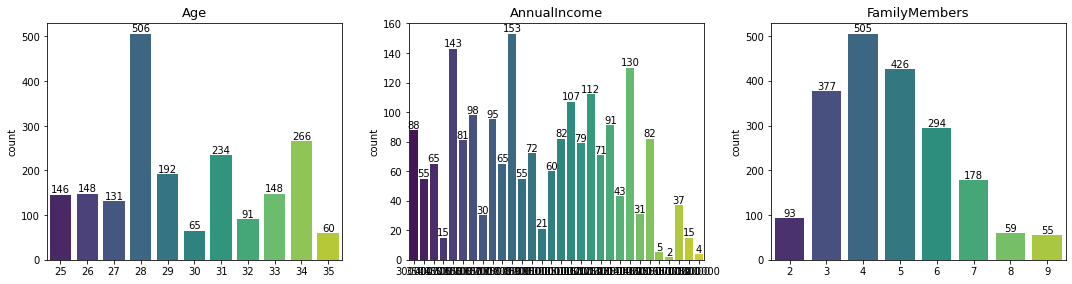

In [ ]:
plt.figure(figsize=(15, 7.5))
for x in range(0, len(num)):
    plt.subplot(2, 3, x+1)
    ax = sns.countplot(x=df[num[x]], palette='viridis', data=df)
    for container in ax.containers:
        ax.bar_label(container)
    plt.title(num[x], fontsize = 13)
    plt.xlabel('')
    plt.tight_layout()

<h2> Sebaran Data

<ipython-input-22-e9892beac077>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[num[x]])
<ipython-input-22-e9892beac077>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[num[x]])
<ipython-input-22-e9892beac077>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in s

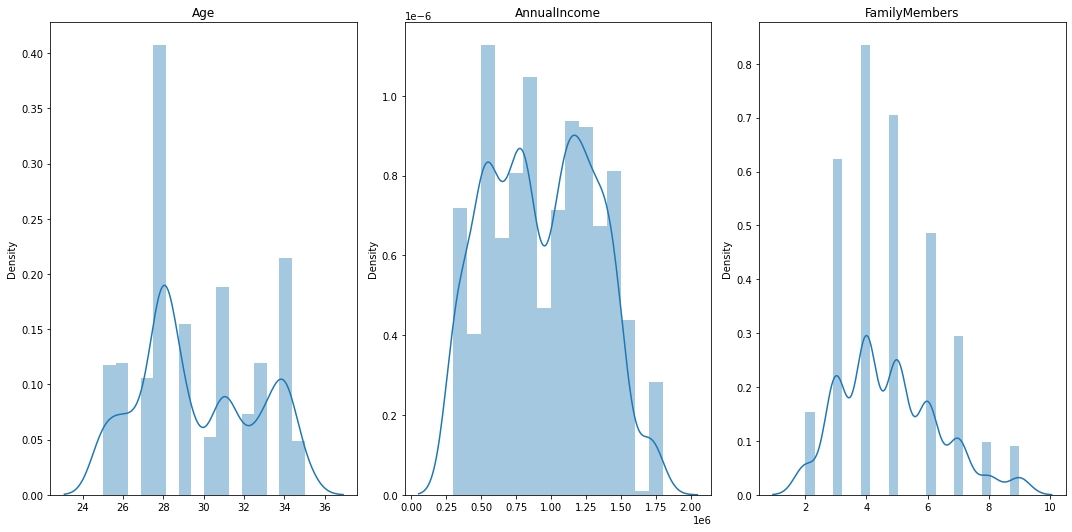

In [ ]:
plt.figure(figsize=(15, 7.5))
for x in range(0, len(num)):
  plt.subplot(1,3,x+1)
  sns.distplot(df[num[x]])
  plt.title(num[x], fontsize=12)
  plt.xlabel('')
  plt.tight_layout()



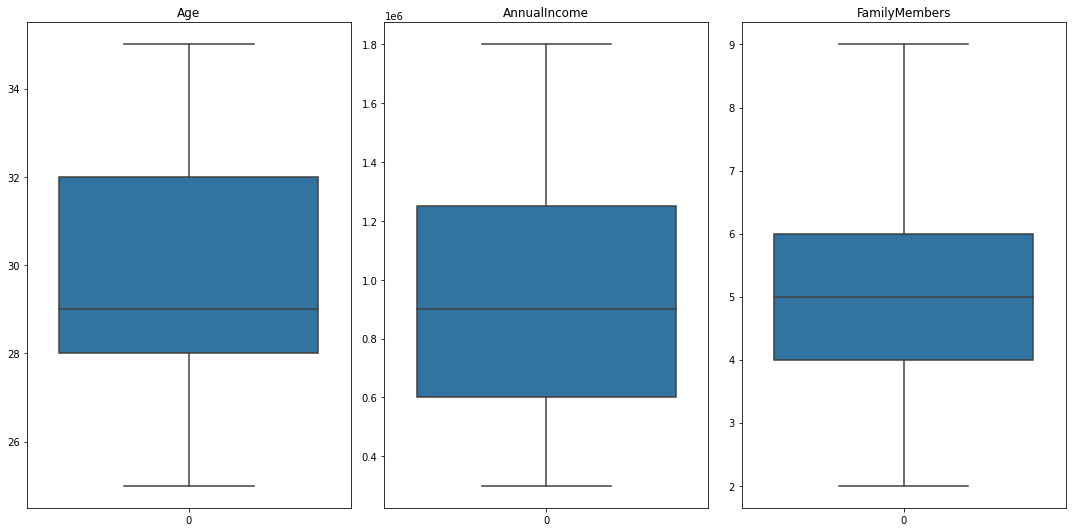

In [ ]:
plt.figure(figsize=(15, 7.5))
for x in range(0, len(num)):
  plt.subplot(1,3,x+1)
  sns.boxplot(df[num[x]])
  plt.title(num[x], fontsize=12)
  plt.xlabel('')
  plt.tight_layout()

In [ ]:
df_grad=df.groupby(['Age','ChronicDiseases']).count()
df_grad

Employment Type  GraduateOrNot  AnnualIncome  \
Age ChronicDiseases                                                 
25  No                           107            107           107   
    Yes                           39             39            39   
26  No                           105            105           105   
    Yes                           43             43            43   
27  No                            96             96            96   
    Yes                           35             35            35   
28  No                           364            364           364   
    Yes                          142            142           142   
29  No                           142            142           142   
    Yes                           50             50            50   
30  No                            47             47            47   
    Yes                           18             18            18   
31  No                           173            173           173   
    Yes                           61             61            61   
32  No                            64             64            64   
    Yes                           27             27            27   
33  No                           101            101           101   
    Yes                           47             47            47   
34  No                           192            192           192   
    Yes                           74             74            74   
35  No                            44             44            44   
    Yes                           16             16            16   

                     FamilyMembers  FrequentFlyer  EverTravelledAbroad  \
Age ChronicDiseases                                                      
25  No                         107            107                  107   
    Yes                         39             39                   39   
26  No                         105            105                  105   
    Yes                         43             43                   43   
27  No                          96             96                   96   
    Yes                         35             35                   35   
28  No                         364            364                  364   
    Yes                        142            142                  142   
29  No                         142            142                  142   
    Yes                         50             50                   50   
30  No                          47             47                   47   
    Yes                         18             18                   18   
31  No                         173            173                  173   
    Yes                         61             61                   61   
32  No                          64             64                   64   
    Yes                         27             27                   27   
33  No                         101            101                  101   
    Yes                         47             47                   47   
34  No                         192            192                  192   
    Yes                         74             74                   74   
35  No                          44             44                   44   
    Yes                         16             16                   16   

                     TravelInsurance  
Age ChronicDiseases                   
25  No                           107  
    Yes                           39  
26  No                           105  
    Yes                           43  
27  No                            96  
    Yes                           35  
28  No                           364  
    Yes                          142  
29  No                           142  
    Yes                           50  
30  No                            47  
    Yes                           18  
31  No                           173  
  

In [ ]:
df["TravelInsurance"]= df["TravelInsurance"].map({"not purchased": 0, "purchased": 1})
df["EverTravelledAbroad"]= df["EverTravelledAbroad"].map({"No": 0, "Yes": 1})
df["FrequentFlyer"]= df["FrequentFlyer"].map({"No": 0, "Yes": 1})
df["ChronicDiseases"]= df["ChronicDiseases"].map({"No": 0, "Yes": 1})
df["GraduateOrNot"]= df["GraduateOrNot"].map({"No": 0, "Yes": 1})
df["Employment Type"]= df["Employment Type"].map({"Private Sector/Self Employed": 0, "Government Sector": 1})
df.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,1,1,400000,6,1,0,0,0
1,31,0,1,1250000,7,0,0,0,0
2,34,0,1,500000,4,1,0,0,1
3,28,0,1,700000,3,1,0,0,0
4,28,0,1,700000,8,1,1,0,0


<Axes: >

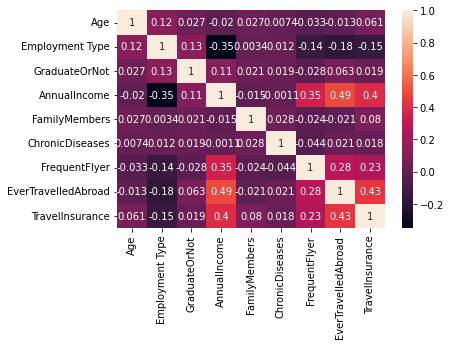

In [ ]:
sns.heatmap(df.corr(),annot=True)

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

def cramer_v(x,y):
  confusion_matrix=pd.crosstab(x,y)
  chi2 = chi2_contingency(confusion_matrix)[0]
  n = confusion_matrix.sum().sum()
  phi2 = chi2/n
  r,k = confusion_matrix.shape
  phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
  rcorr = r - ((r-1)**2)/(n-1)
  kcorr = k - ((k-1)**2)/(n-1)
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

<Axes: >

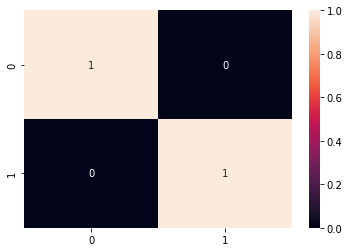

In [ ]:
corr=cramer_v(df['Age'],df['ChronicDiseases'])
sns.heatmap([[1,corr],[corr,1]],annot=True)

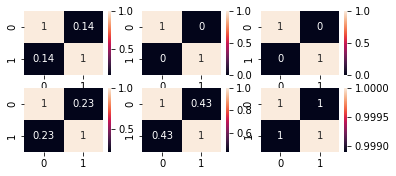

In [ ]:
for x in range(0, len(cat)):
  plt.subplot(3,3,x+1)
  corr=cramer_v(df[cat[x]],df['TravelInsurance'])
  sns.heatmap([[1,corr],[corr,1]],annot=True)